In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import os
import glob
import numpy as np
from keras.preprocessing import image

In [26]:
def load_images(main_directory):
    all_images = []
    labels = []

    # Loop through each subdirectory in the main directory
    for subdir in os.listdir(main_directory):
        full_subdir_path = os.path.join(main_directory, subdir)

        # Check if it's a directory (not a file or other type)
        if os.path.isdir(full_subdir_path):

            # Loop through each file in the subdirectory
            for file in glob.glob(os.path.join(full_subdir_path, '*.*')):
                img = image.load_img(file, target_size=(224, 224))
                img_array = image.img_to_array(img)
                all_images.append(img_array)
                labels.append(subdir)  # using the subdirectory name as label
    
    np_images = np.array(all_images).astype('float32')  # Convert to numpy array
    np_images /= 255.0 # Normalize images

    return np_images, labels

In [ ]:
# Alternative approach
"""
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

In [29]:
train_images, train_labels = load_images('../data/skin-lesions/train/')
test_images, test_labels = load_images('../data/skin-lesions/test/')
valid_images, valid_labels = load_images('../data/skin-lesions/valid/')

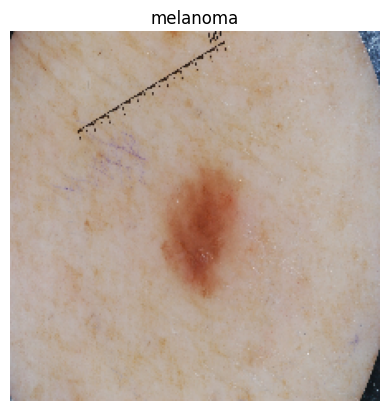

In [31]:
plt.imshow(valid_images[5])
plt.title(valid_labels[5])
plt.axis('off')
plt.show()

In [ ]:
def encoder(labels):

    # Define a manual mapping for specific labels
    mapping = {
        'melanoma': 0,
        'nevus': 1,
        'seborrheic_keratosis': 1
    }

    # Transform labels to numerical values using the manual mapping
    encoded_labels = np.array([mapping[label] for label in labels])
    
    return encoded_labels

In [46]:
# encode the labels
train_labels_encoded = encoder(train_labels)
test_labels_encoded = encoder(test_labels)
valid_labels_encoded = encoder(valid_labels)

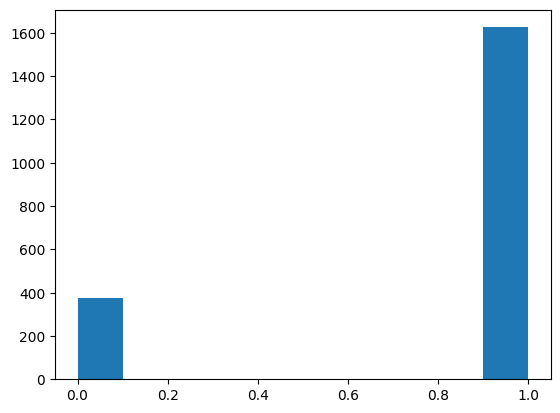

In [52]:
plt.hist(train_labels_encoded)
plt.show()

In [2]:
import tensorflow as tf
from keras.applications import EfficientNetV2S
from keras.optimizers import Adam
from keras.models import Sequential

In [5]:
efficient_net = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [6]:
mobile_net = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
efficient_netB3 = tf.keras.applications.EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [104]:
model = Sequential([
    efficient_net,
    tf.keras.layers.Dense(units = 120, activation='relu'),
    tf.keras.layers.Dense(units = 120, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation='sigmoid'),
])

In [105]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 7, 7, 1280)        20331360  
 al)                                                             
                                                                 
 dense_26 (Dense)            (None, 7, 7, 120)         153720    
                                                                 
 dense_27 (Dense)            (None, 7, 7, 120)         14520     
                                                                 
 dense_28 (Dense)            (None, 7, 7, 1)           121       
                                                                 
Total params: 20499721 (78.20 MB)
Trainable params: 20345849 (77.61 MB)
Non-trainable params: 153872 (601.06 KB)
_________________________________________________________________


In [83]:
model1 = Sequential([
    mobile_net,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 120, activation='relu'),
    tf.keras.layers.Dense(units = 120, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation='sigmoid'),
])

In [96]:
model2 = Sequential([
    efficient_netB3,
    tf.keras.layers.Dense(units = 120, activation='relu'),
    tf.keras.layers.Dense(units = 120, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation='sigmoid'),
])

In [97]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1000)              12320535  
 )                                                               
                                                                 
 dense_20 (Dense)            (None, 120)               120120    
                                                                 
 dense_21 (Dense)            (None, 120)               14520     
                                                                 
 dense_22 (Dense)            (None, 1)                 121       
                                                                 
Total params: 12455296 (47.51 MB)
Trainable params: 12367993 (47.18 MB)
Non-trainable params: 87303 (341.03 KB)
_________________________________________________________________
